# KNN
### Carlos Marcelo Barrera Nolasco
### 101893

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [62]:
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 12.0)

### Creamos una función que genera 4 círculos en 2D
A los puntos que quedan dentro de los círculos les asignamos la clase "in" y a los que quedan fuera, la clase "out"

In [5]:
def crea_circulos(puntos):
    centros = [[0.2,0.2],[0.25,0.75],[0.7,0.2],[0.75,0.75]]
    radios = [0.15, 0.22, 0.18, 0.20]
    X = np.random.rand(puntos,2)
    Y = []
    for i in range(0,len(X)):
        Y.append([1] if (
                ((np.sqrt(((X[i][0]-centros[0][0])**2)+((X[i][1]-centros[0][1])**2)))<radios[0]) or
                ((np.sqrt(((X[i][0]-centros[1][0])**2)+((X[i][1]-centros[1][1])**2)))<radios[1]) or
                ((np.sqrt(((X[i][0]-centros[2][0])**2)+((X[i][1]-centros[2][1])**2)))<radios[2]) or
                ((np.sqrt(((X[i][0]-centros[3][0])**2)+((X[i][1]-centros[3][1])**2)))<radios[3])
            ) else [0])
    Y = np.array(Y)
    return X,Y

### Generamos los puntos aleatorios clasificados como "in" o "out" y los visualizamos

In [6]:
X,Y = crea_circulos(20000)

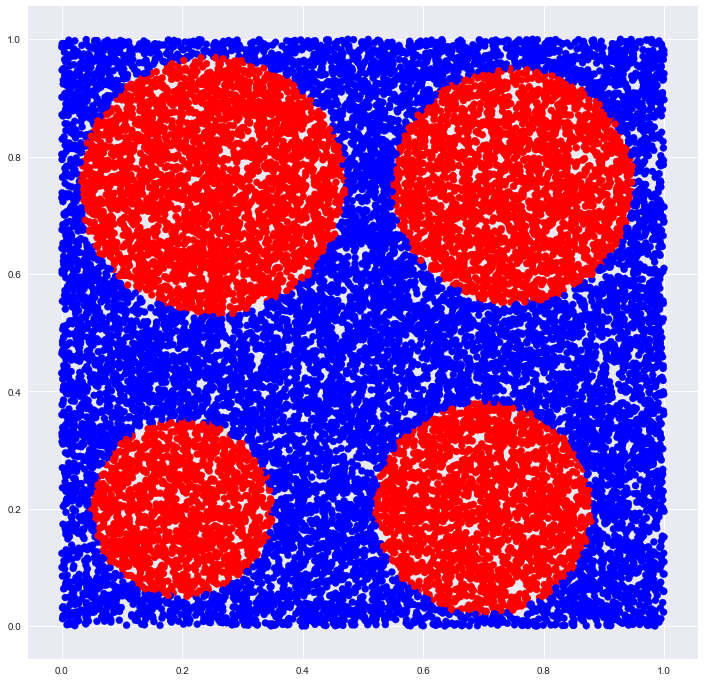

In [7]:
plt.scatter(X[:,0],X[:,1], c=['red' if i==1 else 'blue' for i in Y])

### Separamos el set en entrenamiento y test

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.75)
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

### Visualizamos los datos de entrenamiento

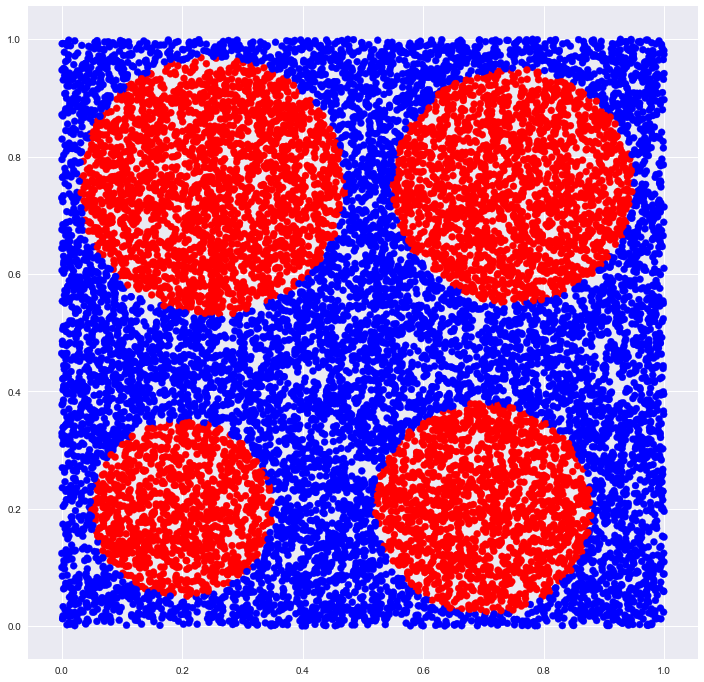

In [9]:
plt.scatter(X_train[:,0],X_train[:,1], c=['red' if i==1 else 'blue' for i in Y_train])

### SVM

In [53]:
classifier = SVC(kernel='rbf', C=100)
classifier.fit(X_train, Y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Visualización de las predicciones

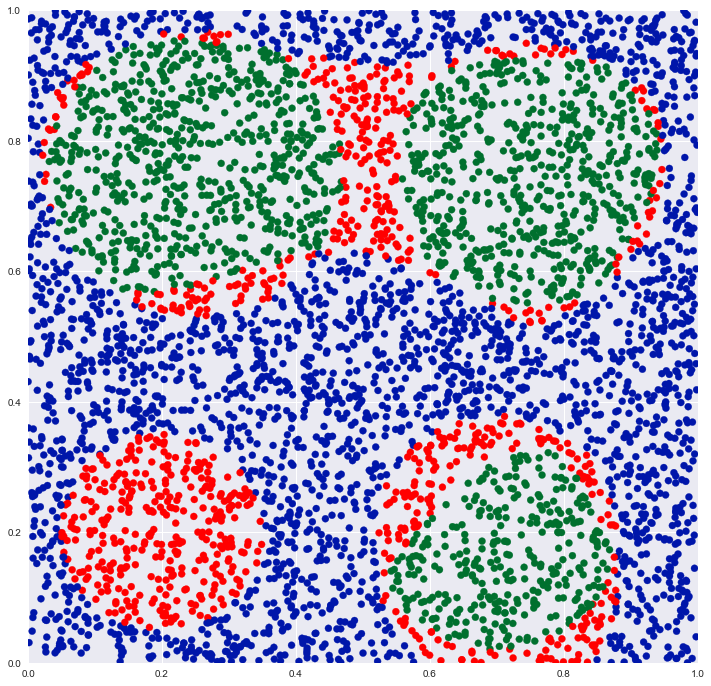

In [54]:
Y_predict_svm = classifier.predict(X_test)
col_svm = []

for i in range(0, len(X_test)):
    if (Y_predict_svm[i] == 0 and Y_test[i][0] == 0):
        col_svm.append("#0016aa")
    elif (Y_predict_svm[i] == 1 and Y_test[i][0] == 1):
        col_svm.append("#00702e")
    else:
        col_svm.append("red")

    
plt.scatter(X_test[:,0],X_test[:,1], c=col_svm)

plt.ylim([0,1])
plt.xlim([0,1])

plt.show()
plt.clf()

En la gráfica anterior podemos ver en verde los puntos clasificados correctamente como dentro de los círculos, en azul los puntos clasificados correctamente como fuera de los círculos y en rojo los puntos que fueron clasificados erroneamente.

### Métricas de desempeño
#### Accuracy

In [55]:
print "Accuracy: ", str(accuracy_score(Y_test,Y_predict_svm)*100)

Accuracy:  81.88


#### Matriz de Confusión

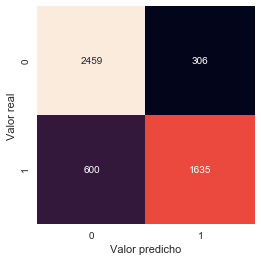

In [60]:
plt.close()
plt.rcParams['figure.figsize'] = (4.0, 4.0)
matriz_conf_svm = confusion_matrix(Y_test, Y_predict_svm)
sns.heatmap(matriz_conf_svm, square = True, annot = True, cbar = False, fmt='g')
plt.xlabel('Valor predicho')
plt.ylabel('Valor real')

### KNN

In [65]:
classifier_knn = KNeighborsClassifier(n_neighbors=5)
classifier_knn.fit(X_train, Y_train.ravel()) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

#### Visualización de las predicciones

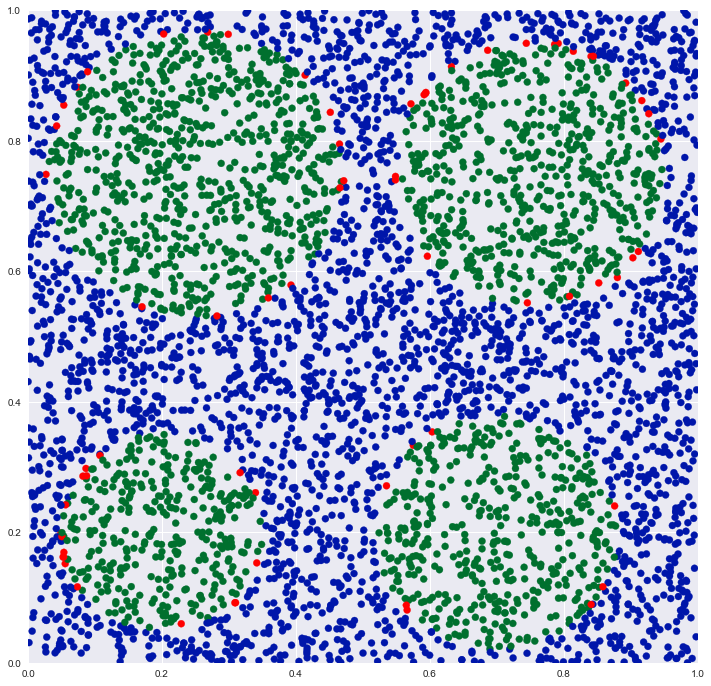

In [66]:
Y_predict_knn = classifier_knn.predict(X_test)
col_knn = []

for i in range(0, len(X_test)):
    if (Y_predict_knn[i] == 0 and Y_test[i][0] == 0):
        col_knn.append("#0016aa")
    elif (Y_predict_knn[i] == 1 and Y_test[i][0] == 1):
        col_knn.append("#00702e")
    else:
        col_knn.append("red")

plt.close()
plt.rcParams['figure.figsize'] = (12.0, 12.0)
plt.scatter(X_test[:,0],X_test[:,1], c=col_knn)

plt.ylim([0,1])
plt.xlim([0,1])

plt.show()
plt.clf()

### Métricas de desempeño
#### Accuracy

In [68]:
print "Accuracy: ", str(accuracy_score(Y_test,Y_predict_knn)*100)

Accuracy:  98.64


#### Matriz de confusión

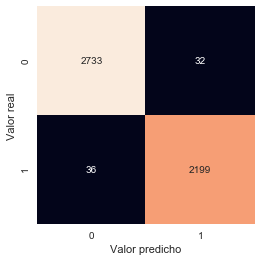

In [69]:
plt.close()
plt.rcParams['figure.figsize'] = (4.0, 4.0)
matriz_conf_svm = confusion_matrix(Y_test, Y_predict_knn)
sns.heatmap(matriz_conf_svm, square = True, annot = True, cbar = False, fmt='g')
plt.xlabel('Valor predicho')
plt.ylabel('Valor real')

### Conclusiones

Podemos observar que el algoritmo de KNN se desempeña bastante mejor que SVM para este dataset particular, de hecho al revisar la gráfica de puntos bien clasificados contra mal clasificados, podemos observar que el algoritmo de SVM  generó dos "nubes" de puntos: una de ellas engloba dos de los circulos originales, la otra nube corresponde a un tercer círculo original, mientras que el círculo ubicado en la parte inferior izquierda es ignorado (cabe observar el hecho de que el círculo ignorado es el de menor área de entre los cuatro originales. A continuación se muestra la gráfica de las predicciones del algoritmo SVM para reforzar estas observaciones.

Por su parte el algoritmo KNN se desempeñó bastante bien (**98.64%** de accuracy vs **81.88%** del SVM), presentando elementos mal clasificados solamente en los bordes de los círculos.

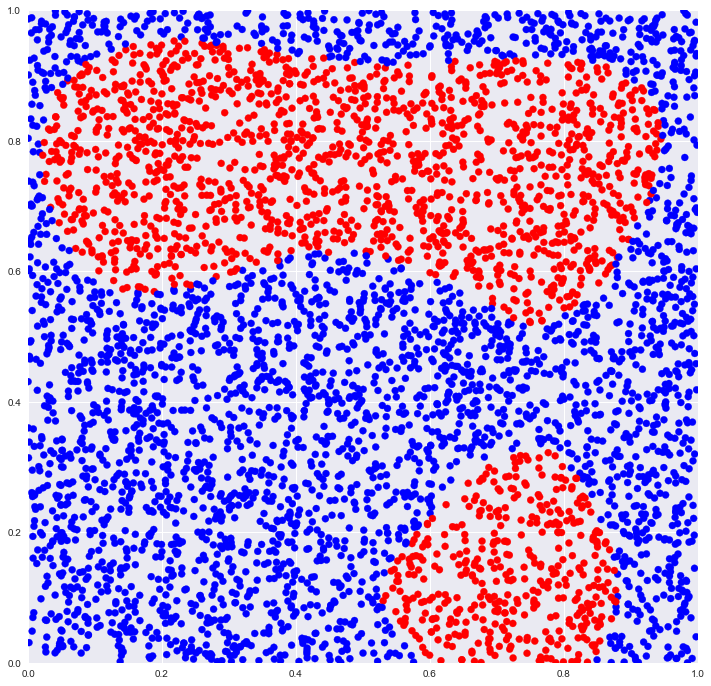

In [71]:
plt.close()
plt.rcParams['figure.figsize'] = (12.0, 12.0)

plt.scatter(X_test[:,0],X_test[:,1], c=['red' if i==1 else 'blue' for i in Y_predict_svm])

plt.ylim([0,1])
plt.xlim([0,1])

plt.show()
plt.clf()